#  Anomaly Detection Isolation Forest

Anomaly detection is a technique used in data analysis to identify patterns or observations that deviate significantly from the normal behavior of a dataset. Isolation Forest is one of the algorithms commonly used for anomaly detection.

Isolation Forest is an unsupervised learning algorithm that was introduced by Liu et al. in 2008. It is based on the concept of isolating anomalies rather than explicitly modeling normal data points. The algorithm works by randomly selecting a feature and then randomly selecting a split value within the range of that feature. This process is repeated recursively to create a binary tree structure called an isolation tree.

During the construction of an isolation tree, anomalies are expected to be isolated into their own branches faster than normal data points. The idea is that anomalies are few and different, making them easier to isolate. By counting the number of splits required to isolate a point, a measure of anomaly score can be obtained.

To detect anomalies using an Isolation Forest, a forest of these isolation trees is created. Each tree is built independently, and the final anomaly score for a data point is calculated as the average path length of that point across all the trees in the forest. Points with shorter average path lengths are considered anomalies, as they required fewer splits to be isolated.

Isolation Forest has several advantages for anomaly detection. It is computationally efficient and can handle large datasets effectively. It does not rely on assumptions of the underlying data distribution, making it suitable for various types of data. It also provides a measure of anomaly score, which can be used to rank anomalies based on their severity.

However, Isolation Forest may not perform well when dealing with highly overlapping or clustered data points. In such cases, other anomaly detection algorithms like clustering-based approaches or density-based methods may be more appropriate.

Overall, Isolation Forest is a useful technique for detecting anomalies in datasets and has been successfully applied in various domains, including fraud detection, intrusion detection, and system monitoring.

## `Isolation Forest`

Isolation Forest is an algorithm specifically designed for anomaly detection. It aims to separate anomalies from normal data points by creating isolation trees and measuring the ease of isolating each data point. The key idea behind Isolation Forest is that anomalies are typically isolated faster than normal data points.

The algorithm provides several insights into anomaly detection:

- 1. `Anomalies are rare`: Isolation Forest assumes that anomalies are few and different compared to normal data points. It exploits the fact that anomalies are often located in sparser regions of the data distribution, making them easier to isolate.

- 2. `Isolation by random partitioning`: Isolation Forest randomly selects features and randomly splits the data points based on those features. This random partitioning process effectively isolates anomalies by separating them from the rest of the data.

- 3. `Path length as anomaly score`: The average path length traversed by a data point in the isolation trees is used as an anomaly score. Points with shorter path lengths are considered more likely to be anomalies. This score can be used to rank anomalies and set a threshold for anomaly detection.

- 4. `Unsupervised learning`: Isolation Forest is an unsupervised learning algorithm, meaning it does not require labeled data for training. It can automatically learn the normal behavior of the dataset and identify anomalies based on deviations from that behavior.

- 5. `Efficient for large datasets`: Isolation Forest is computationally efficient and can handle large datasets effectively. The construction of isolation trees can be parallelized, making it suitable for processing big data.

- 6. `Not influenced by data distribution`: Isolation Forest does not rely on assumptions about the underlying data distribution. It can work well with data that has complex and non-linear relationships. This flexibility makes it applicable to various types of data.

- 7. `Limitations in clustered data`: Isolation Forest may encounter challenges when dealing with highly overlapping or clustered data points. In such cases, anomalies may not be easily separable, and the algorithm's performance may degrade. Other methods, such as clustering-based or density-based approaches, may be more suitable in these scenarios.

Overall, Isolation Forest provides a framework for identifying anomalies in datasets and offers insights into the characteristics of anomalies. It has proven to be effective in various anomaly detection applications and is a valuable tool in data analysis.

## Anomaly Score

The anomaly score in Isolation Forest is calculated based on the average path length of a data point in the isolation trees of the forest. Here's a step-by-step process to calculate the anomaly score for a given data point:

Construct the Isolation Forest: First, you need to build an Isolation Forest by creating a set of isolation trees. Each tree is constructed as follows:

a. Randomly select a feature: Choose a random feature from the dataset.

b. Randomly select a split value: Randomly select a value within the range of that feature.

c. Split the data: Divide the data based on the selected split value and feature. Points with values lower than the split value go to the left branch, and points with values higher go to the right branch.

d. Repeat the process: Recursively repeat steps a-c until each data point is isolated in its own leaf node or a predefined stopping criterion is met.

Calculate path lengths: Once you have the isolation forest, you calculate the path length for the given data point in each tree. The path length is the number of edges traversed from the root to reach the leaf node containing the data point.

Compute the anomaly score: The anomaly score for the data point is calculated as the average path length across all the trees in the forest. It represents how isolated the data point is compared to other points. Points with shorter average path lengths are considered more likely to be anomalies.

Normalize the score (optional): If needed, you can normalize the anomaly score to a specific range or scale, such as between 0 and 1, to facilitate easier interpretation or comparison with other scores.

Note that the anomaly score is relative to the dataset being analyzed. You may need to establish a threshold or use statistical techniques to determine the cutoff point for classifying a data point as an anomaly based on its anomaly score.

By following this process, you can calculate the anomaly score for each data point in your dataset and use it to identify and rank anomalies based on their deviation from the normal behavior of the d


The mathematical formula for calculating the anomaly score in Isolation Forest is as follows:

Let's denote the anomaly score for a data point x as S(x). Given an isolation forest with T trees, and for each tree t (where t ranges from 1 to T), the path length of the data point x is denoted as P_t(x). The average path length for x across all the trees is denoted as c(x):

c(x) = (1 / T) * Σ P_t(x)

where Σ denotes summation over all the trees.

The anomaly score S(x) is then calculated based on c(x) and a normalization factor, typically represented as score_norm:

S(x) = 2^(-c(x) / score_norm)

The normalization factor score_norm is derived from the average path length of unsuccessful search in a binary tree, which is approximately 2 * (log(N - 1) + 0.5772156649) for an isolation tree, where N is the number of data points in the training set used to construct the tree.

By applying this formula, you can calculate the anomaly score S(x) for a given data point x, which represents its relative degree of anomaly within the dataset. Smaller values of S(x) indicate a higher likelihood of being an anomaly.

## Isolation Forest Anomaly Detection

In [2]:
import pandas as pd
df = pd.read_csv("healthcare.csv")
df.head()

,0,1
0,1.616671,1.944522
1,1.256461,1.609444
2,-2.343919,4.392961
3,1.195393,2.794485
4,-3.329586,5.303160


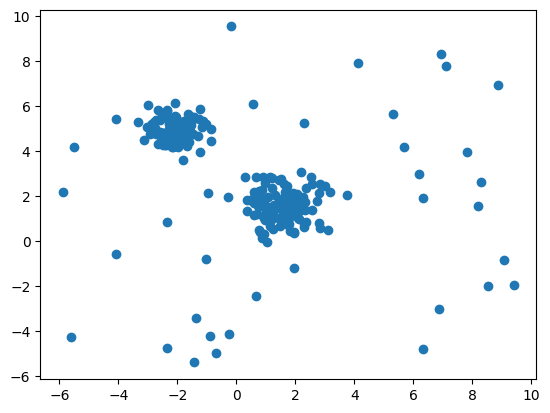

In [3]:
import matplotlib.pyplot as plt
plt.scatter(df.iloc[:,0], df.iloc[:,1])

In [5]:
from sklearn.ensemble import IsolationForest
clf= IsolationForest(contamination=0.2)

In [8]:
clf.fit(df)
predictions = clf.predict(df)

C:\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


In [10]:
predictions

array([ 1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, -1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1, -1, -1,  1,
        1,  1, -1,  1, -1,  1,  1,  1,  1, -1, -1,  1, -1,  1,  1,  1, -1,
        1,  1,  1,  1, -1,  1, -1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,
       -1,  1, -1,  1, -1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
        1,  1, -1,  1,  1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1, -1,  1,  1, -1,  1,  1,
        1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,
        1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1, -1, -1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1,  1, -1,  1,  1, -1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1, -1,  1,  1, -1,  1, -1,  1,  1, -1,  1,  1, -1,
       -1,  1,  1,  1,  1

In [11]:
import numpy as np
abn_ind =  np.where(predictions <0)
abn_ind

(array([  4,  20,  24,  45,  48,  49,  53,  55,  60,  61,  63,  67,  72,
         74,  78,  83,  85,  87,  89,  92,  97, 104, 108, 114, 119, 126,
        130, 133, 141, 151, 160, 166, 167, 177, 179, 182, 187, 199, 204,
        209, 212, 214, 217, 220, 221, 227, 242, 244, 247, 248], dtype=int64),)

In [14]:
x=df.values
x

array([[ 1.61667145,  1.94452201],
       [ 1.2564615 ,  1.60944428],
       [-2.34391881,  4.3929613 ],
       [ 1.19539251,  2.79448461],
       [-3.32958612,  5.30315976],
       [ 1.6241983 ,  1.21875334],
       [ 0.45611969,  1.80757419],
       [ 0.62304325,  2.04424325],
       [-2.05908202,  4.6599109 ],
       [ 2.16307638,  1.39149293],
       [-2.13386677,  4.43599433],
       [-1.65311342,  4.92021328],
       [ 0.75047316,  2.23811621],
       [-1.71073925,  5.17482723],
       [ 0.86102444,  2.2819114 ],
       [-1.86274182,  4.55454246],
       [ 1.48027244,  1.79983231],
       [ 1.45223088,  2.69933991],
       [-1.65509092,  5.65092311],
       [ 1.22887123,  1.28838807],
       [ 9.39915672, -1.97148327],
       [ 2.04025339,  2.07645291],
       [ 0.890442  ,  1.09480523],
       [-2.35235014,  5.47163036],
       [ 0.56612677,  6.08881822],
       [-2.38207196,  4.28110426],
       [-2.57809122,  5.39059905],
       [-1.92902342,  4.84033579],
       [-2.40668213,

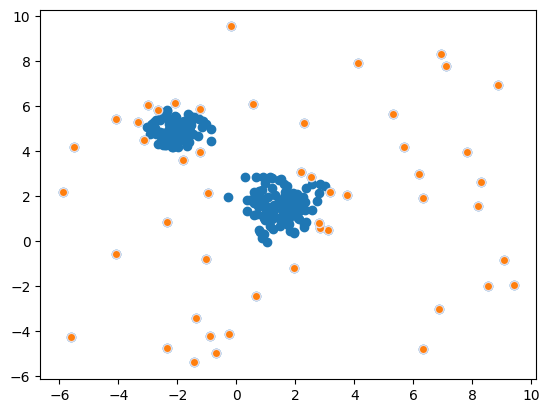

In [23]:
abn_ind = np.where(predictions < 0)
plt.scatter(df.iloc[:,0],df.iloc[:,1])
plt.scatter(x[abn_ind, 0], x[abn_ind,1],edgecolors='#eefd')